<a href="https://colab.research.google.com/github/sedavasema/mohammad/blob/main/mnist2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import matplotlib as plt

In [47]:
x0=np.array(12)
x1=np.array([12,10,20])
x2=np.array([[[1,2,3],
             [4,5,6],
             [7,8,9]],
             [[10,11,12],
              [14,15,16],
              [17,18,19]]])
print('x2',x2.ndim)

x2 3


In [37]:
#@title
train_images.shape
train_images.ndim
train_images.dtype
print('train_image shape is: ' ,train_images.shape)
print('train_image dtype is: ' ,train_images.dtype)
print('train_images ndim is: ' ,train_images.ndim)

train_image shape is:  (60000, 28, 28)
train_image dtype is:  uint8
train_images ndim is:  3


# شبکه عصبی فولی کانکتد

## mnist کار کردن با دیتا بیس 

In [55]:
import keras
import tensorflow
from keras.datasets import mnist
from keras.utils import np_utils


In [51]:
(train_images, train_labels),(test_images,test_labels)=mnist.load_data()


In [78]:
#داده دیگر تصویر نیست پس به آن ایمیج نمیگوییم
X_train=train_images.reshape(60000,784)
X_test=test_images.reshape(10000,784)
#چون میخواهیم داده ها را نرمال کنیم آنها را اعشاری میکنیم
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train /=255
X_test /=255
#حال باید لیبل ها رو برای لایه سافت مکس آماده کنیم
Y_train=np_utils.to_categorical(train_labels)
Y_test=np_utils.to_categorical(test_labels)

## ساختن شبکه عصبی

In [66]:
from keras.models import Sequential
myModel=Sequential()
from keras.layers import Dense
myModel.add(Dense(500,activation='relu',input_shape=(784,)))
myModel.add(Dense(100,activation='relu'))
myModel.add(Dense(10,activation='softmax'))

In [67]:
myModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 500)               392500    
                                                                 
 dense_2 (Dense)             (None, 100)               50100     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 443,610
Trainable params: 443,610
Non-trainable params: 0
_________________________________________________________________


## کامپایل کردن وآموزش شبکه عصبی

In [95]:
from keras.optimizers import SGD
from keras.losses import categorical_crossentropy
myModel.compile(optimizer=SGD(lr=0.001),loss=categorical_crossentropy,metrics=['accuracy'])

network_history=myModel.fit(X_train,Y_train,batch_size=128,epochs=20)



Epoch 1/20
469/469 [==============================] - 8s 16ms/step - loss: 0.9858 - accuracy: 0.8112
Epoch 2/20
469/469 [==============================] - 10s 22ms/step - loss: 0.8401 - accuracy: 0.8310
Epoch 3/20
469/469 [==============================] - 7s 14ms/step - loss: 0.7378 - accuracy: 0.8435
Epoch 4/20
469/469 [==============================] - 6s 13ms/step - loss: 0.6638 - accuracy: 0.8533
Epoch 5/20
469/469 [==============================] - 10s 19ms/step - loss: 0.6084 - accuracy: 0.8606
Epoch 6/20
469/469 [==============================] - 9s 19ms/step - loss: 0.5657 - accuracy: 0.8667
Epoch 7/20
469/469 [==============================] - 6s 13ms/step - loss: 0.5317 - accuracy: 0.8715
Epoch 8/20
469/469 [==============================] - 8s 17ms/step - loss: 0.5041 - accuracy: 0.8754
Epoch 9/20
469/469 [==============================] - 6s 12ms/step - loss: 0.4811 - accuracy: 0.8789
Epoch 10/20
469/469 [==============================] - 10s 21ms/step - loss: 0.4618 - acc

In [96]:
history=network_history.history
type(history)
history.keys()

dict_keys(['loss', 'accuracy'])

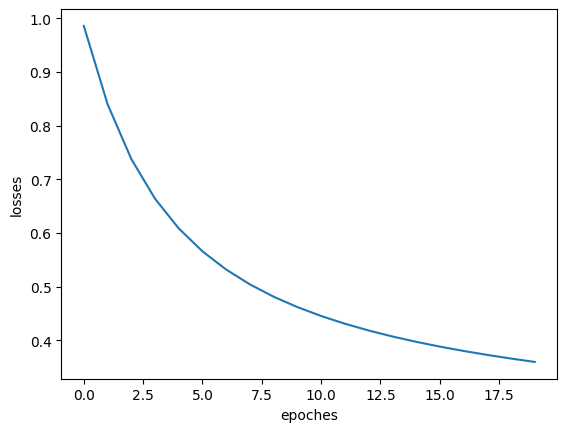

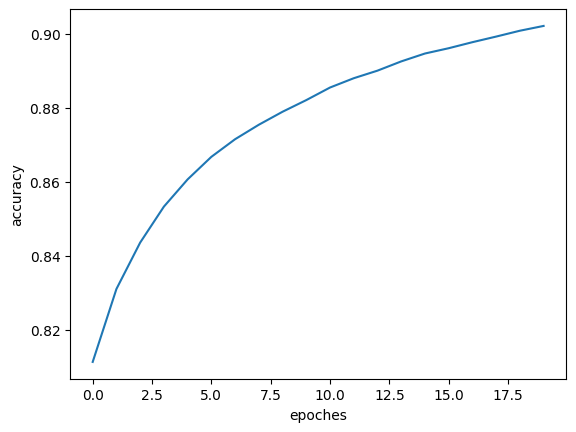

In [108]:
import matplotlib.pyplot as plt
losses=history['loss']
accuracy=history['accuracy']
plt.xlabel('epoches')
plt.ylabel('losses')
plt.plot(losses)
plt.figure()
plt.xlabel('epoches')
plt.ylabel('accuracy')
plt.plot(accuracy)
